In [28]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import glob
import pandas as pd

In [29]:
# 画像を読み込み、グレースケールに変換
image_path = '../data/sample6.jpg'
image = Image.open(image_path).convert('L')

# 画像をnumpy配列に変換
image_array = np.array(image)

# ピクセル値は黒0、白255

In [30]:
# 画像サイズの確認
image_array.shape

(887, 610)

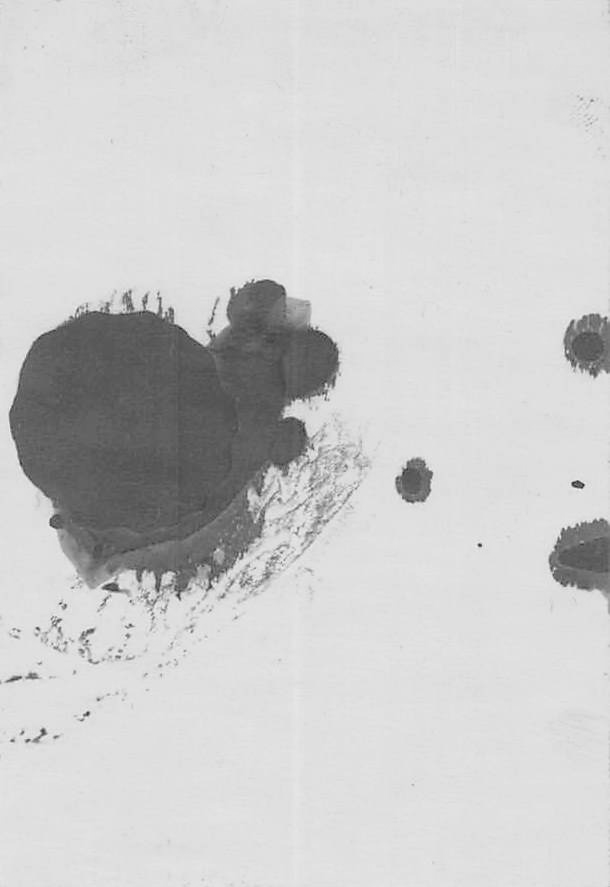

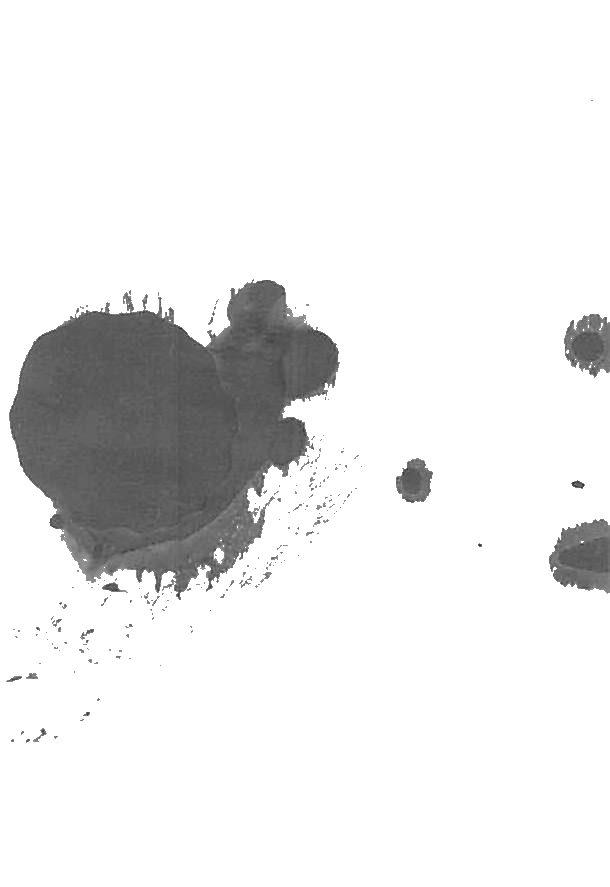

In [31]:
# しきい値を設定
threshold =150

# 新しい画像を作成し、しきい値以下のピクセルのみを残し、他は255（白）に設定
threshold_image_array = np.where(image_array <= threshold, image_array, 255)

# numpy配列を画像に戻す
threshold_image = Image.fromarray(threshold_image_array)

# 画像を表示
image.show()
threshold_image.show()

In [26]:


# しきい値よりも濃い（暗い）ピクセルの数をカウント
dark_pixels = np.sum(image_array <= threshold)

# 全体のピクセル数を取得
total_pixels = image_array.size

# 濃いピクセルの割合を計算
dark_pixel_ratio = dark_pixels / total_pixels

print(f'濃いピクセルの割合: {dark_pixel_ratio:.2%}')

濃いピクセルの割合: 0.00%


In [27]:
# 各ピクセル値の出現数をカウント
pixel_counts = np.bincount(image_array.flatten(), minlength=256)

# 結果を表示
for value, count in enumerate(pixel_counts):
    # ピクセル値0は除外
    if count != 0:
        print(f'ピクセル値 {value}: {count}個')

ピクセル値 163: 518個
ピクセル値 164: 130個
ピクセル値 165: 844個
ピクセル値 166: 182個
ピクセル値 167: 1892個
ピクセル値 168: 1752個
ピクセル値 169: 3378個
ピクセル値 170: 3834個
ピクセル値 171: 7316個
ピクセル値 172: 8196個
ピクセル値 173: 1924796個
ピクセル値 174: 6238個
ピクセル値 175: 3884個
ピクセル値 176: 2470個
ピクセル値 177: 2076個
ピクセル値 178: 1324個
ピクセル値 179: 416個
ピクセル値 180: 610個
ピクセル値 181: 168個
ピクセル値 182: 234個
ピクセル値 183: 364個
ピクセル値 184: 364個
ピクセル値 185: 350個
ピクセル値 186: 220個
ピクセル値 187: 298個
ピクセル値 188: 182個
ピクセル値 189: 390個
ピクセル値 191: 192個
ピクセル値 195: 182個
ピクセル値 200: 416個
ピクセル値 202: 168個
ピクセル値 203: 520個
ピクセル値 204: 192個
ピクセル値 205: 312個
ピクセル値 206: 234個
ピクセル値 211: 182個
ピクセル値 212: 374個
ピクセル値 214: 52個
ピクセル値 216: 360個
ピクセル値 217: 208個
ピクセル値 218: 376個
ピクセル値 219: 130個
ピクセル値 221: 182個
ピクセル値 222: 336個
ピクセル値 224: 244個
ピクセル値 225: 350個
ピクセル値 226: 182個
ピクセル値 227: 376個
ピクセル値 228: 182個
ピクセル値 229: 582個
ピクセル値 230: 312個
ピクセル値 231: 182個
ピクセル値 237: 182個
ピクセル値 238: 182個
ピクセル値 239: 390個
ピクセル値 240: 572個
ピクセル値 241: 192個
ピクセル値 242: 390個
ピクセル値 243: 192個
ピクセル値 244: 182個
ピクセル値 245: 182個
ピクセル値 246:

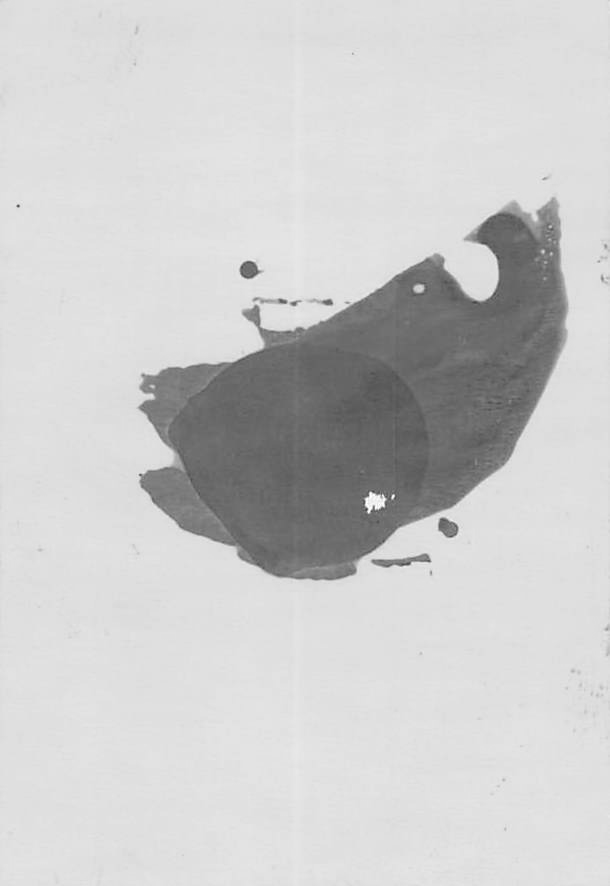

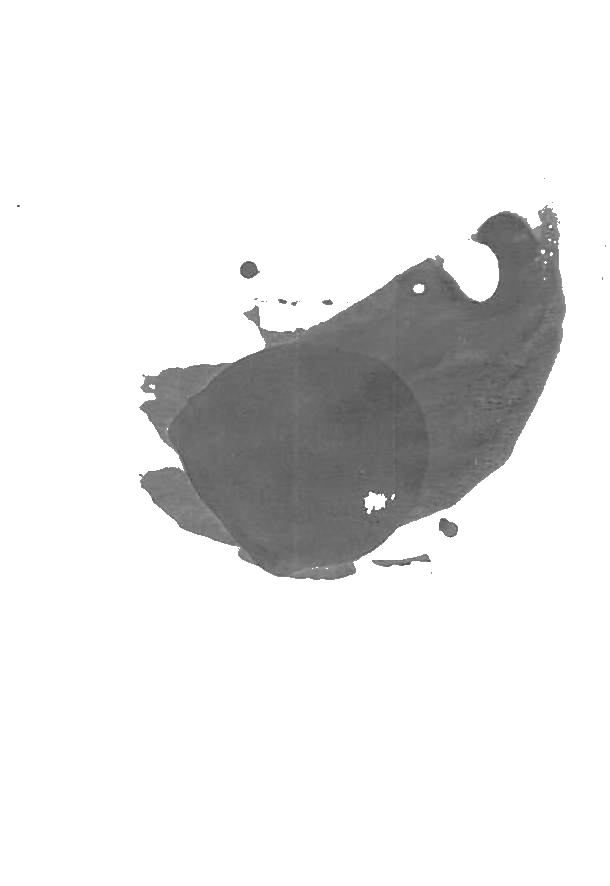

In [7]:
threshold_image = Image.fromarray(threshold_image_array)

# 画像を表示
image.show()
threshold_image.show()

In [8]:
# 加工した画像にテキストを入れ込み保存

# ImageDrawオブジェクトを作成
draw = ImageDraw.Draw(threshold_image)

# フォントの設定（システムのデフォルトフォントを使用）
font = ImageFont.load_default()

# フォントサイズを指定します（例: 40）
# font = ImageFont.truetype("arial", 40) 

# テキストを追加する位置（x, y）を指定
position = (50, 50)

# 描画するテキスト
text = "Hello, World!"

# テキストの色（黒）
text_color = 0  

# 画像にテキストを描画
draw.text(position, text, fill=text_color, font=font)


output_path = '../data/new_sample3.jpeg'  # 保存するファイルのパスを指定してください
threshold_image.save(output_path)

In [9]:
output_path = '../data/new_sample3.jpeg'
image.save(output_path)

In [10]:
# ディレクトリのパスを指定
directory_path = '../data'

# 指定されたディレクトリ内のすべてのファイルリストを取得
files = glob.glob(f'{directory_path}/*.jpg')

# ファイルリストを表示
print(files)

['../data/sample6.jpg', '../data/sample2.jpg', '../data/sample4.jpg', '../data/sample7.jpg', '../data/sample3.jpg', '../data/sample5.jpg', '../data/sample1.jpg']


In [11]:
path = '../data/imageinfo.csv'
df = pd.read_csv(path)
df

,name,value
0,img1,NaN
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


In [12]:
df['value'].iloc[0]= dark_pixel_ratio
df

/tmp/ipykernel_1897/2660744495.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['value'].iloc[0]= dark_pixel_ratio
/tmp/ipykernel_1897/2660744495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,name,value
0,img1,0.166321
1,img2,NaN
2,img3,NaN
3,img4,NaN
4,img5,NaN
5,img6,NaN
6,img7,NaN


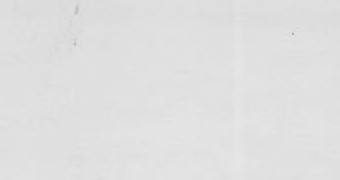

In [15]:
im_crop = image.crop((60, 20, 400, 200))
im_crop

In [18]:
def crop_center(pil_img, crop_area):
    img_width, img_height = pil_img.size
    crop_width = int(img_width * (1-crop_area))
    crop_height = int(img_height * (1-crop_area))
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

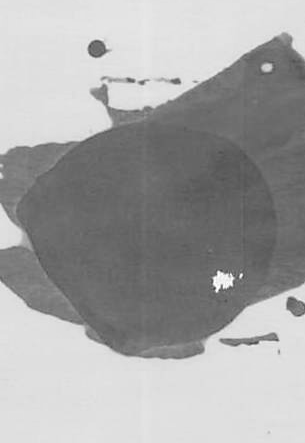

In [21]:
croped_img = crop_center(image,0.5)
croped_img